# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

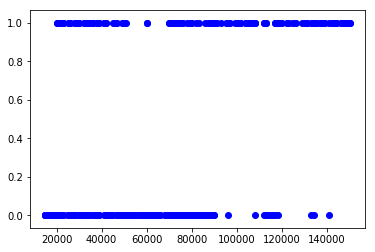

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
#Matrix of features
X = dataset.iloc[:, [2, 3]].values
#Vector of dependent variable
y = dataset.iloc[:, 4].values
plt.scatter(X[:,1], y, color = 'blue')


# Splitting the dataset into the Training set and Test set


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.25,random_state=0)
# y_train - dependent variable vector of the training set
# y_test - dependent variable vector of the test set

# Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fitting Model to the Training set


In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# Fit the regressor object into the training set
classifier.fit(X_train, y_train)
# regressor is the machine that learns the corelation of the training set to make some future predictions 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Predicting the Test set results

In [6]:
# Predict the observation for the test set
# y_pred is a vector of prediction 
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
# y_test consists the real values and y_pred consists of the predicted values

In [7]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [8]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [9]:
y_prob

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.])

In [10]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Evaluating the model

In [11]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [12]:
# Create the cofusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

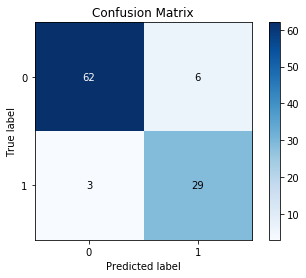

In [13]:
#plot the cofusion matrix
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

In [14]:
#print accuracy
print(accuracy_score(y_test,y_pred))

0.91


In [15]:
print(classification_report(y_test,y_pred))
# precision (true posistive / (true postive + false positive)) 
#- is the fraction of relevant instances among the retrieved instances

# recall (true positive / (true postive + false negatives) ) 
#- is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.

#  2*((precision*recall)/(precision+recall))
# The support is the number of samples of the true response that lie in that class

             precision    recall  f1-score   support

          0       0.95      0.91      0.93        68
          1       0.83      0.91      0.87        32

avg / total       0.91      0.91      0.91       100



In [16]:
import statsmodels.formula.api as sm
# create a new logistic model from the statsmodel library and fit the data
logistic_model = sm.Logit(endog = y_train, exog = X_train).fit()
# Get the statiscal matrices of the model
logistic_model.summary2()

Optimization terminated successfully.
         Current function value: 0.431764
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   7.0000  
Dependent Variable: y                Pseudo R-squared: 0.345   
Date:               2018-06-07 05:34 AIC:              263.0582
No. Observations:   300              BIC:              270.4658
Df Model:           1                Log-Likelihood:   -129.53 
Df Residuals:       298              LL-Null:          -197.69 
Converged:          1.0000           Scale:            1.0000  
------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      1.9250      0.2432    7.9147    0.0000    1.4483    2.4018
x2      1.0735      0.1975    5.4359    0.0000    0.6864    1.4605
===============================================================

"""

# Visualising the Training set results

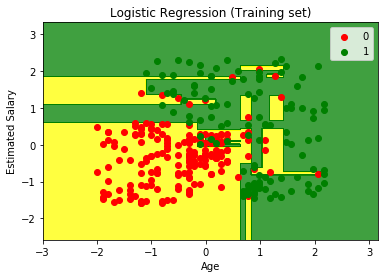

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

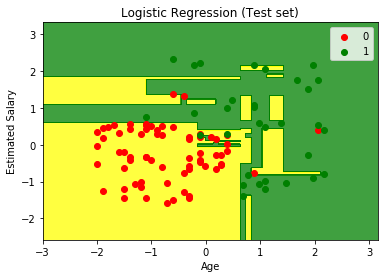

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()